# Project Overview 

## Step 1: Understand the Data 


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


- What questions will we answer? 

- Is the data suffiecient to answer these questions?

- What are the limitations of your data?

- Who will you share this data with? 


## Step 2: Explore your Data


Introduce the dataset briefly
Be explicit about the questions you want to answer
Preliminary Wrangling

Conduct preliminary data wrangling
Record which features you are interested in investigating and which features will help support that investigation
Use the "Question-Visualization-Observations" framework
Data Exploration and Visualization

- Univariate exploration
- Create a histogram
- Create a bar chart or count plot
- Bivariate exploration
- Create a scatter plot
- Create a box plot
- Create a heatmap or clustered bar chart
- Multivariate exploration
- Create a facet plot
- Create a plot matrix or scatter plot, with multiple encodings.


## Step 3: Documentation

At the end of each data exploration section, answer the questions given in the template.
At the end of the notebook, record your conclusions.
Write a summary of the main findings
Reflect on the steps taken during the data exploration

----------------------

## Chosen data - Ford GoBike System Data

Business background

- Ford GoBike is expanding the area’s existing bike-share program to 546 stations and 7,000 bikes – serving San Francisco, San Jose and East Bay; riders can access GoBike through the FordPass. 


- Fastest-growing mode of transportation with usage surging 184 percent between 2006 and 2015, according to the San Francisco Municipal Transportation Agency. In fact, the number of people in the city commuting to work on bikes nearly doubled, according to U.S. Census Bureau

- By the end of this summer there will be 3,500 of these bikes available throughout San Francisco, East Bay and San Jose – and by the end of next year the region will have 546 stations and 7,000 bikes, making Ford GoBike the nation’s second-largest bike-share program.

- The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.



# Data available 

- duration_sec	
- start_time	
- end_time	
- start_station_id	
- start_station_name	
- start_station_latitude	
- start_station_longitude	end_station_id	
- end_station_name	
- end_station_latitude	
- end_station_longitude	
- bike_id	user_type	
- member_birth_year	
- member_gender	
- bike_share_for_all_trip


## Questions to Answer

Yes based on the data available we can answer these questions:

1) What time do people most use this service? 

2) What day of the week is most busy, least busy? (By user_type)

3) What time of the day is the most demanding? 

4) Who uses this service the most? (subscribers / customers)

5) Who uses this service the most by age and gender?

6) How long to people normally use this bike? 

7) Do people bike share? 

--------------------------

In [1]:
#Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load in data 
df = pd.read_csv('201902-fordgobike-tripdata.csv', sep=',');

#Initial inspection 
df.head(10)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# Check shape 
df.shape

(183412, 16)

In [4]:
# Check columns and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Data types for certain columns are not correct and need to be changed to better analyze the data. 

<Axes: >

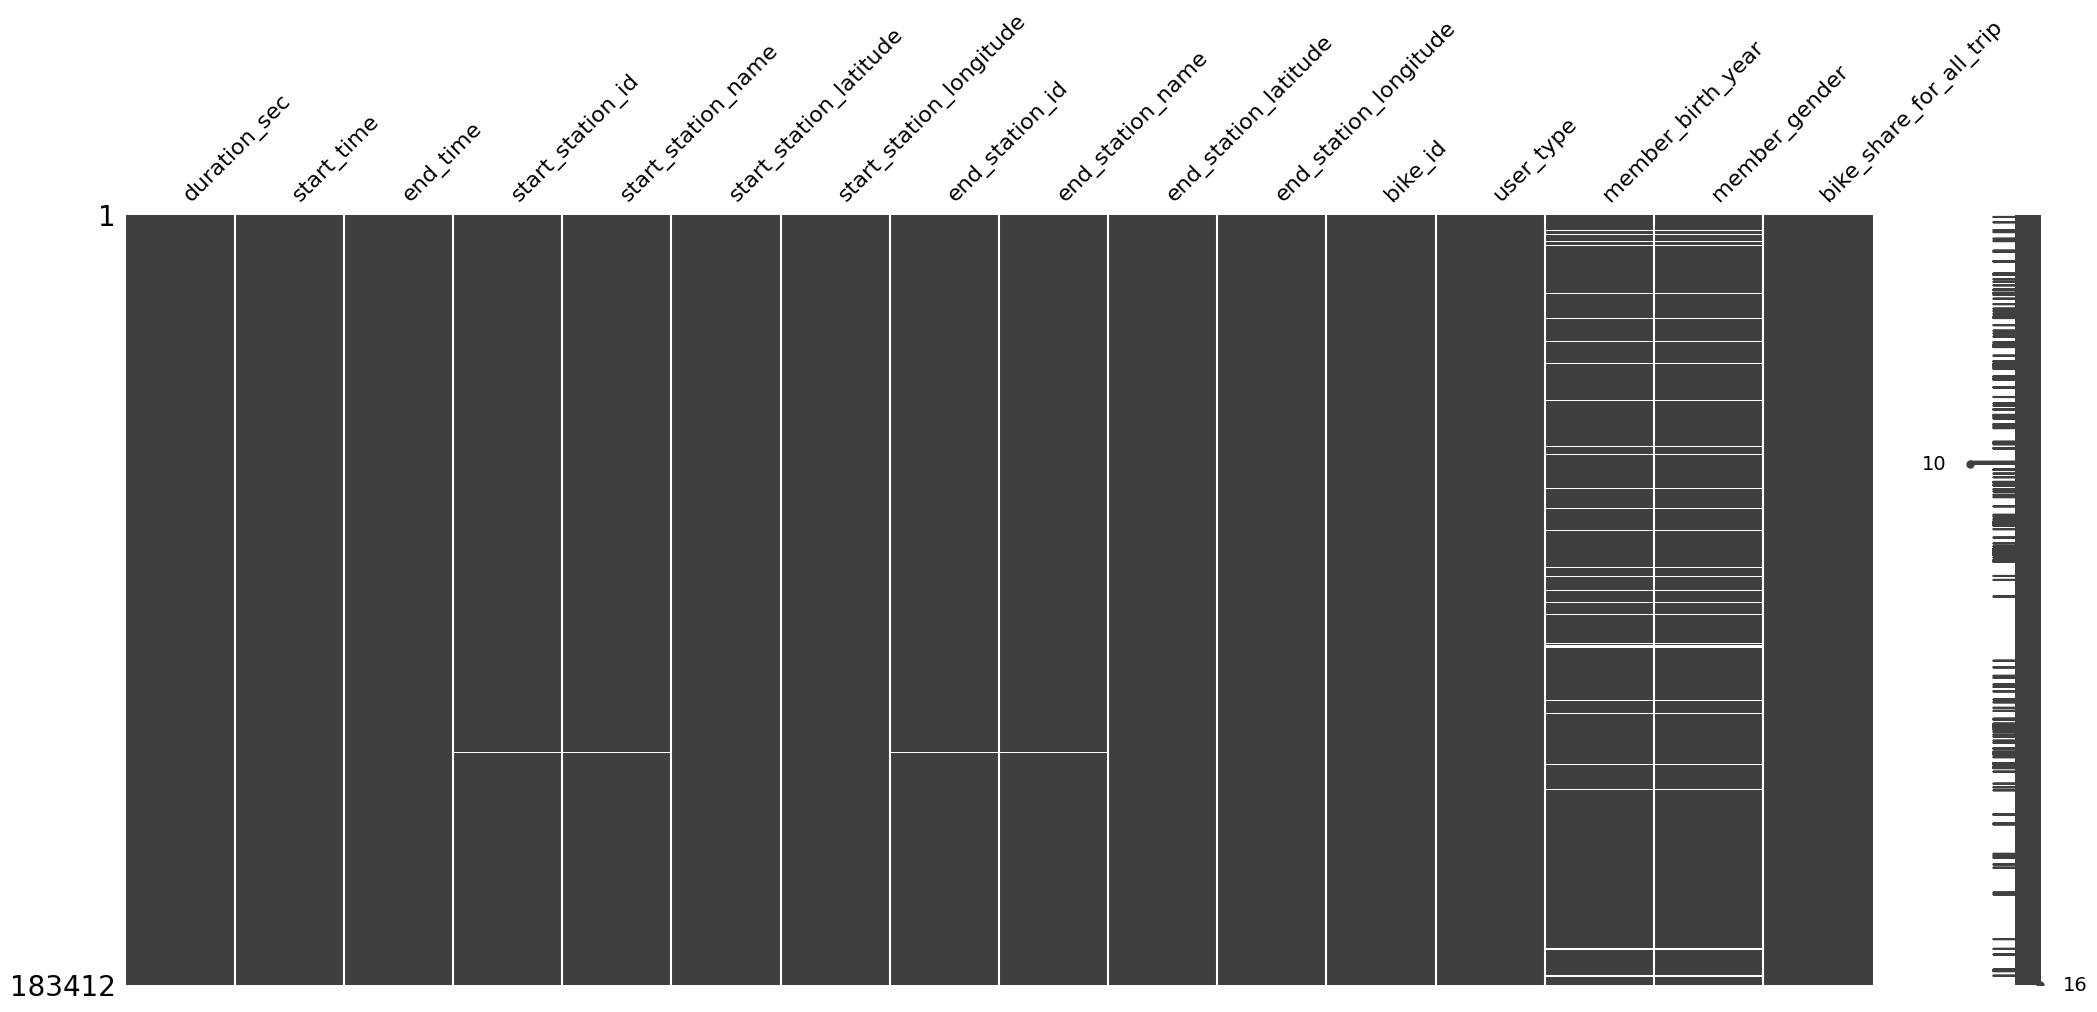

In [5]:
# Visualize missing data 
ms.matrix(df)

In [6]:
# Missing data for birthday(age identification)
df.member_birth_year.isnull().value_counts()

member_birth_year
False    175147
True       8265
Name: count, dtype: int64

Birthday can be private information that users do not want to specify and is not mandatory resulting in missing data.

In [7]:
# Misisng data for Gender
df.member_gender.isnull().value_counts()

member_gender
False    175147
True       8265
Name: count, dtype: int64

There is an Other option but users skipped it and the data is missing.

## Insight 
Both gender and birthday have the exact same amount of missing data and the columns match exactly fo those missing values. Missing data for station_id and station_name as well but a small amount.

--------------------------

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb


- 'start_time' and 'end_time' are not datetime type
- 'start_station_id', 'end_station_id', 'member_birth_year' and 'bike_id' are not object type

In [9]:
# Duplicate values 
df.duplicated().sum()

0

In [10]:
#Outliers 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Through initial inspections we get a better understanding of the data. 

- Changing data types
- Handle missing values
- Remove duplicates if any 
- Identify outliers if any



### Tidiness 
df table = None

--------------------------

# Data Cleaning Process

## 1.Handle missing data 

- member_birthday_year
- member_gender
- start_station_id

In [11]:
# Missing data fill with 0 not remove it 

df.member_birth_year.fillna(0, inplace = True)
df.member_gender.fillna("not defined", inplace = True)

### Why:

We are focusing on age range of riders and will replace the isnull values to 0. If this causes a problem later in the analysis we can remove the null values.

In [12]:
# Coordinates are not precise and can be removed 

df = df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   bike_id                  183412 non-null  int64  
 4   user_type                183412 non-null  object 
 5   member_birth_year        183412 non-null  float64
 6   member_gender            183412 non-null  object 
 7   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ MB


### Why:

This analysis does not focus on the start location of the station. Also found the locations to be unprecise. This column can be removed without effecting the analysis questions. 

<Axes: >

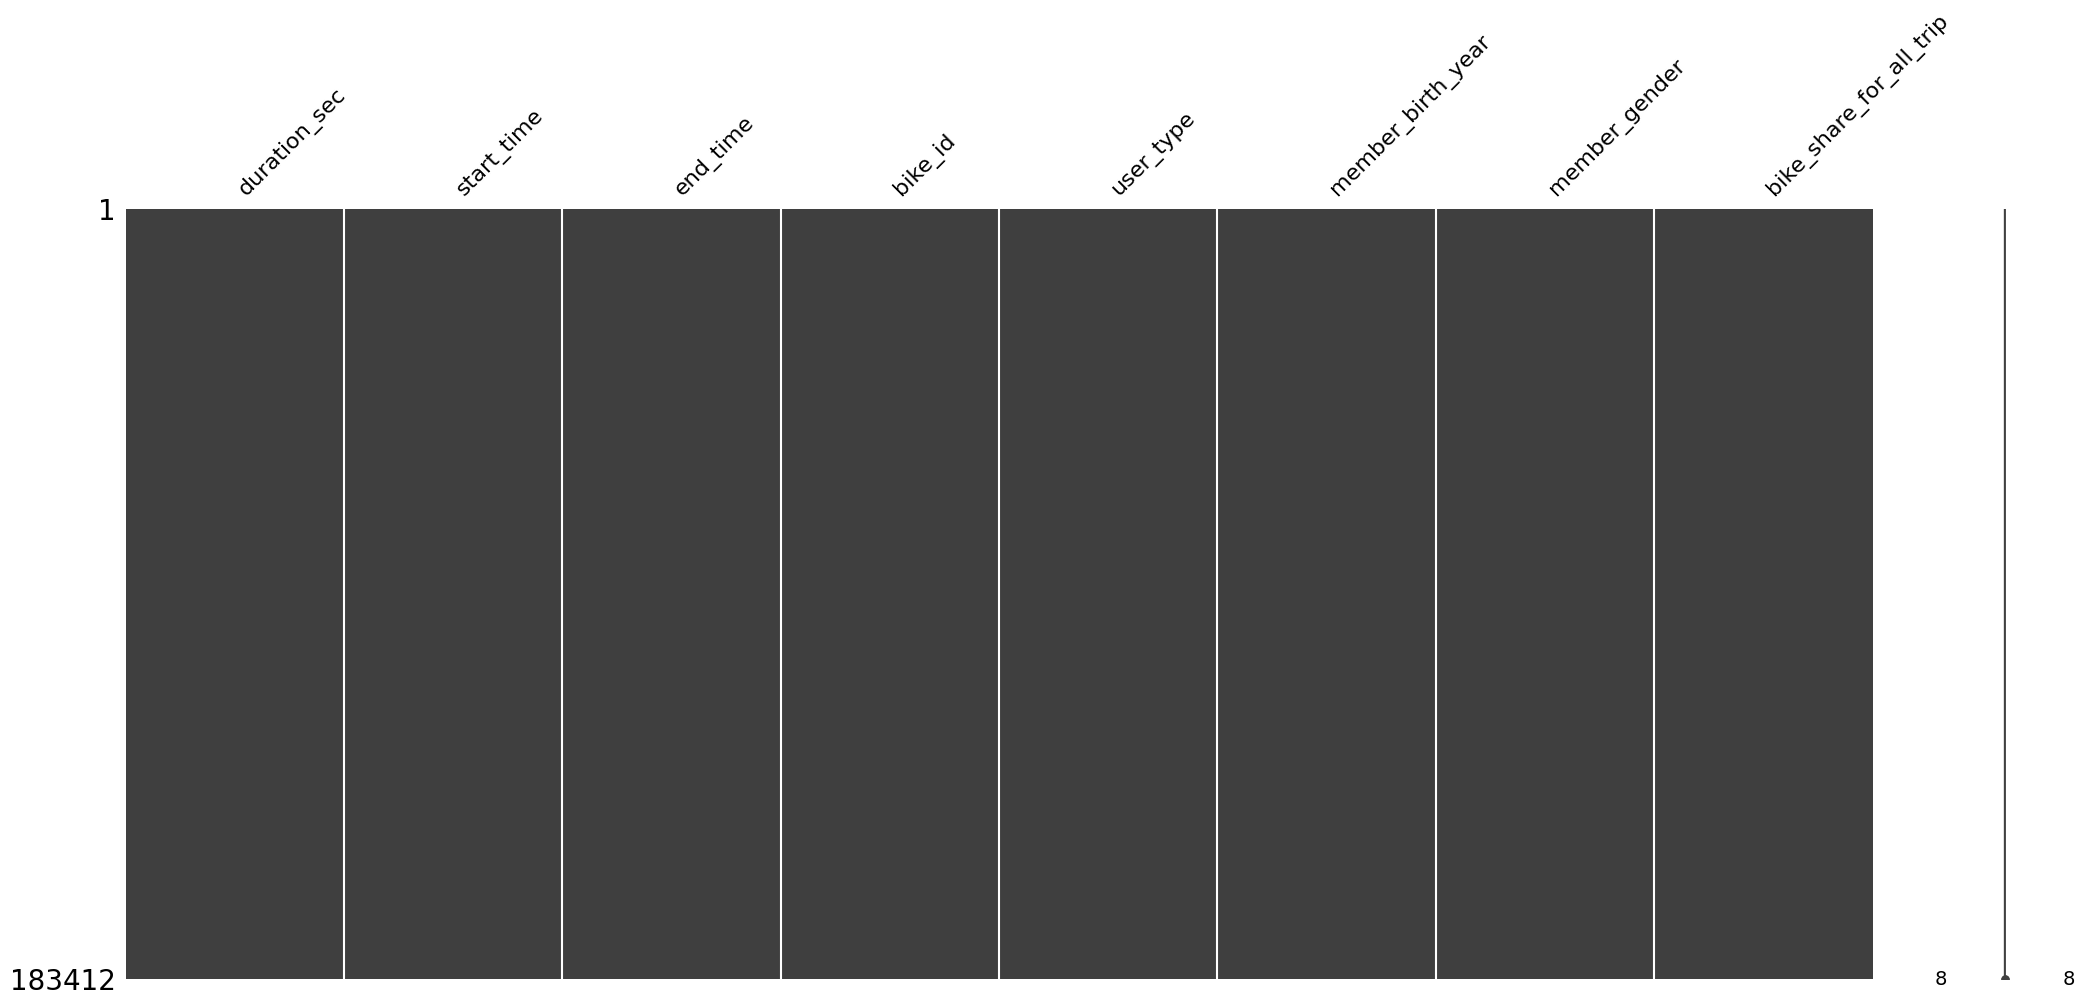

In [13]:
#Verify missing data
ms.matrix(df)

In [14]:
# Check columns, missing data and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   bike_id                  183412 non-null  int64  
 4   user_type                183412 non-null  object 
 5   member_birth_year        183412 non-null  float64
 6   member_gender            183412 non-null  object 
 7   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ MB


-----------------------

## 2. Change data types 

- start time & end time = datetime
- start station & end station = Int
- Start station id, end station id, member birth year & bike id = string  

In [15]:
for col in ["start_time", "end_time"]:
    df[col] = pd.to_datetime(df[col])
    
for col in ["member_birth_year"]:
    df[col] = df[col].astype("int")

for col in ["member_birth_year", "bike_id"]:
    df[col] = df[col].astype("str")

In [16]:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,0,not defined,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974,Male,Yes


### Now that everything is cleaned and understood begin the EDA process. 

-------------------------------------------------------------

## Exploratory Data Analysis

Complete the analysis using these:

- Univariate exploration
- Create a histogram
- Create a bar chart or count plot
- Bivariate exploration
- Create a scatter plot
- Create a box plot
- Create a heatmap or clustered bar chart
- Multivariate exploration
- Create a facet plot
- Create a plot matrix or scatter plot, with multiple encodings.

In [17]:
# Initial inspection
df.head(3)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,0,not defined,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972,Male,No


In [18]:
# Check columns and data types again 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   bike_id                  183412 non-null  object        
 4   user_type                183412 non-null  object        
 5   member_birth_year        183412 non-null  object        
 6   member_gender            183412 non-null  object        
 7   bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 11.2+ MB


-------------------------------------------

## Make copy, start EDA process

In [19]:
# Make copy and keep original 
new_df = df.copy()

In [20]:
new_df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,0,not defined,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974,Male,Yes


In [21]:

new_df['start_date'] = new_df.start_time.dt.strftime('%Y-%m-%d')

new_df['month_of_trip'] = new_df.start_time.dt.strftime('%B')

new_df['day_of_week']= new_df['start_time'].dt.strftime('%A')

new_df['rent_hour']= new_df['start_time'].dt.hour

new_df['return_hour'] = new_df['end_time'].dt.hour

new_df['rent_duration_minute'] = new_df['duration_sec']/60

In [22]:
# Change dataype for birthyear 
new_df['member_birth_year'].describe()

count     183412
unique        76
top         1988
freq       10236
Name: member_birth_year, dtype: object

In [23]:
new_df['member_birth_year'] = new_df['member_birth_year'].astype('int')

In [24]:
new_df['age'] = 2019 - new_df['member_birth_year']

# Start Univariate Exploration 

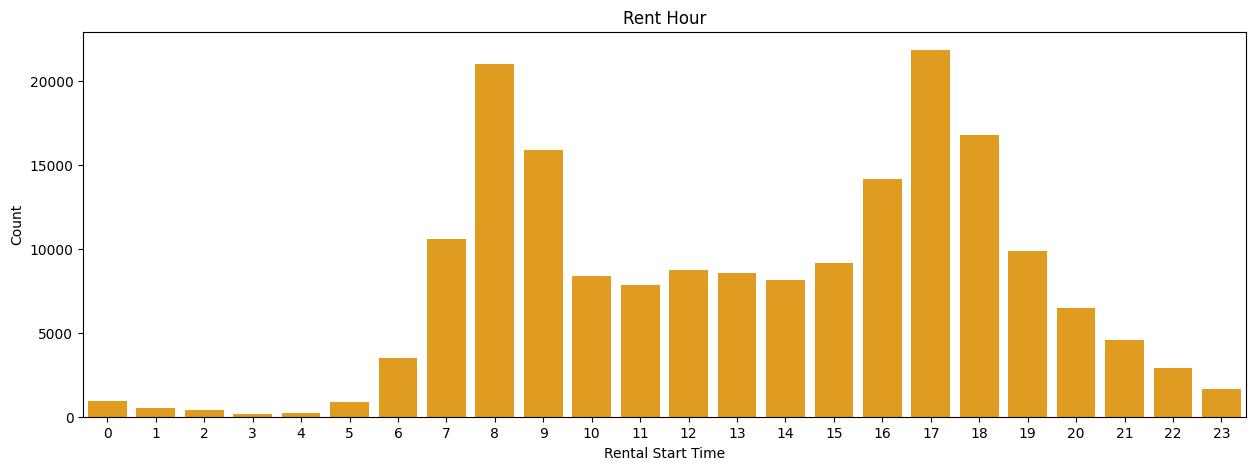

In [25]:
#figure1
plt.subplots(figsize = (15,5))
sns.countplot(data=new_df, x='rent_hour', color = "orange")
plt.title('Rent Hour')
plt.xlabel('Rental Start Time')
plt.ylabel('Count');

- In the morning time 7-9am could be seen as the peak time for rentals. With 8pm having the highest start time. 

- In the afternoon 4-6pm have a spike in start time with 5pm having the highest start time. 

This could be due to working hours generally start and finish work from 8am-5pm / 9am-6pm working hours to and from work creating a higher demand for those times.   

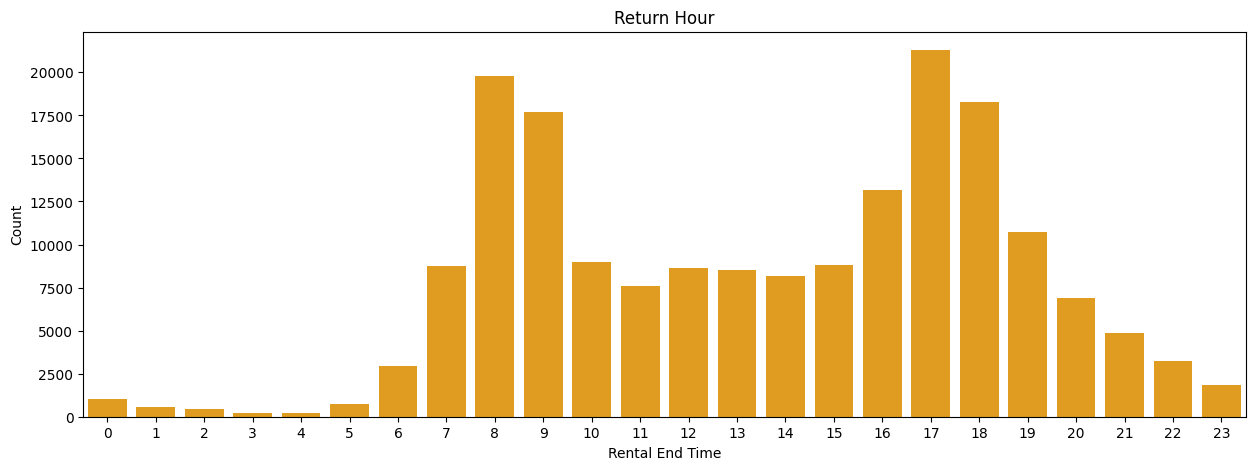

In [26]:
plt.subplots(figsize = (15,5))
sns.countplot(data=new_df, x='return_hour', color = "orange")
plt.title('Return Hour')
plt.xlabel('Rental End Time')
plt.ylabel('Count');

### The rental hour and return hour are very similiar. This could  because the duration of the customer might be shorter than 1 hour. 

In [27]:
# very statistics for duraction time
new_df['rent_duration_minute'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: rent_duration_minute, dtype: float64

This makes sense as the mean, 25% - 75% are within an hour. Meaning someone could rent and return the bike within the same hour making the data show start_time and end_time within the same hour givings us the similiar results above. 

-----------------------

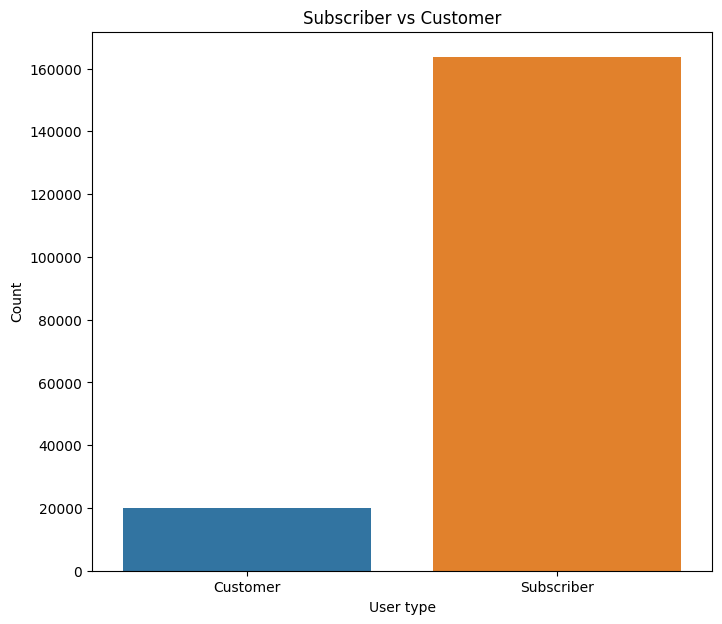

In [28]:
# visualize user base
plt.subplots(figsize = (8,7))
sns.countplot(data = new_df, x = 'user_type')
plt.title('Subscriber vs Customer')
plt.xlabel('User type')
plt.ylabel('Count');

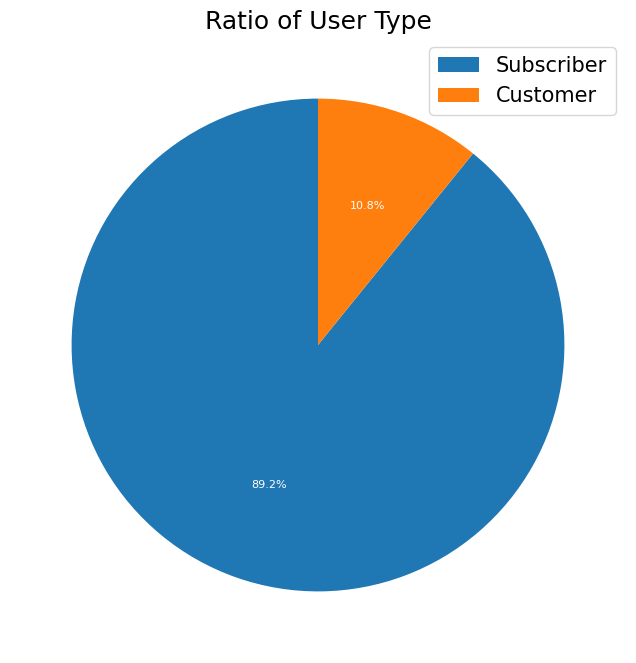

In [29]:
# Counting the number of rides by gender
user_ratio = new_df['user_type'].value_counts()
user_ratio

# Setting the size of the figure
plt.figure(figsize=[8, 8])

# Plotting the Pie Chart showing the distribution of trips taken by Gender
plt.pie(user_ratio, labels = user_ratio.index, startangle = 90,
       autopct= '%1.1f%%', counterclock = True, textprops={'color':'white', 'size':8})
plt.legend(loc='best', fontsize = 15)
plt.title('Ratio of User Type', fontsize = 18);

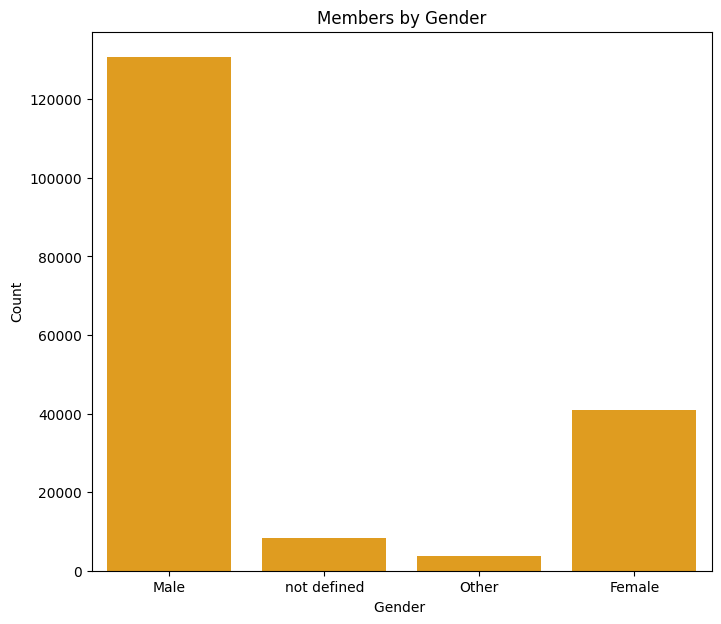

In [30]:
plt.subplots(figsize = (8,7))
sns.countplot(data=new_df, x='member_gender', color = "orange")
plt.title('Members by Gender')
plt.xlabel('Gender ')
plt.ylabel('Count');

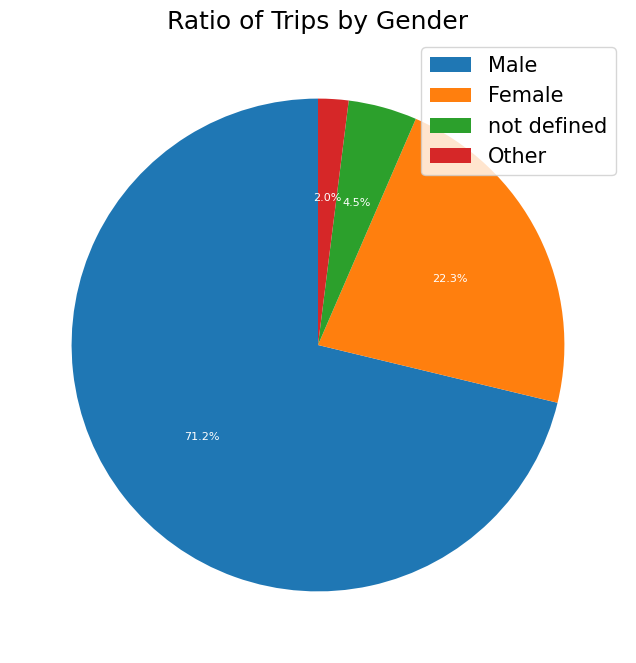

In [31]:
# Counting the number of rides by gender
gender_ratio = new_df['member_gender'].value_counts()
gender_ratio

# Setting the size of the figure
plt.figure(figsize=[8, 8])

# Plotting the Pie Chart showing the distribution of trips taken by Gender
plt.pie(gender_ratio, labels = gender_ratio.index, startangle = 90,
       autopct= '%1.1f%%', counterclock = True, textprops={'color':'white', 'size':8})
plt.legend(loc='best', fontsize = 15)
plt.title('Ratio of Trips by Gender', fontsize = 18);

In [32]:
# Age range of users stastictics
user_age = new_df.query('age < age.quantile(0.99)')
user_age['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

- Outlier of 141 years old, this could be a mistake/error input by user. 

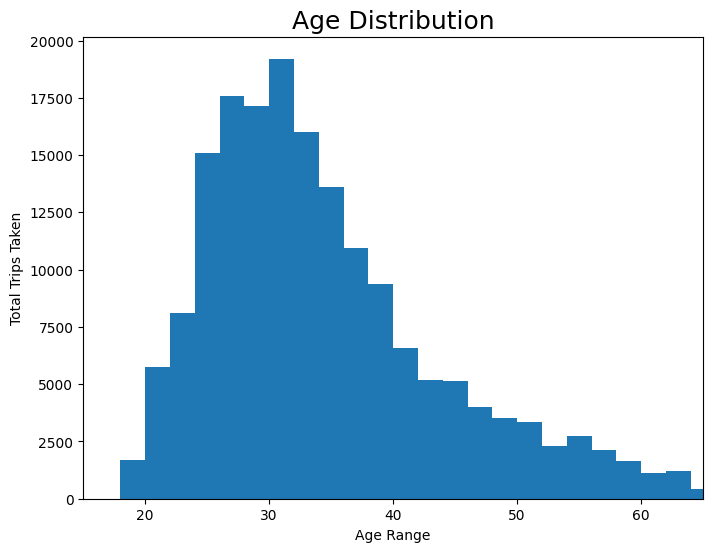

In [33]:
# Setting the bins
bins = np.arange(18, new_df['age'].max()+2, 2)

# Setting the size of the figure
plt.figure(figsize=[8, 6])

# Plotting the histogram
plt.hist(data=new_df, x = 'age', bins=bins)
plt.xlim((15,65))
plt.xlabel('Age Range')
plt.ylabel('Total Trips Taken')
plt.title('Age Distribution', fontsize = 18);

Age 25-35, has the highest age range. Whereas, ages 45-65 being onthe lower end of the age distribution. 

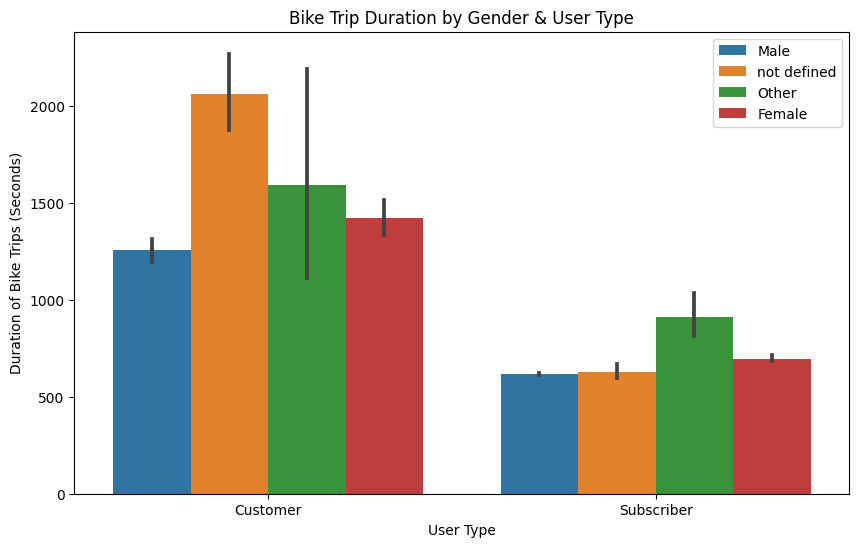

In [34]:
plt.figure(figsize = [10, 6])
ax = sns.barplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender').legend(loc='best')

plt.ylabel('Duration of Bike Trips (Seconds)')
plt.xlabel('User Type')
plt.title("Bike Trip Duration by Gender & User Type");

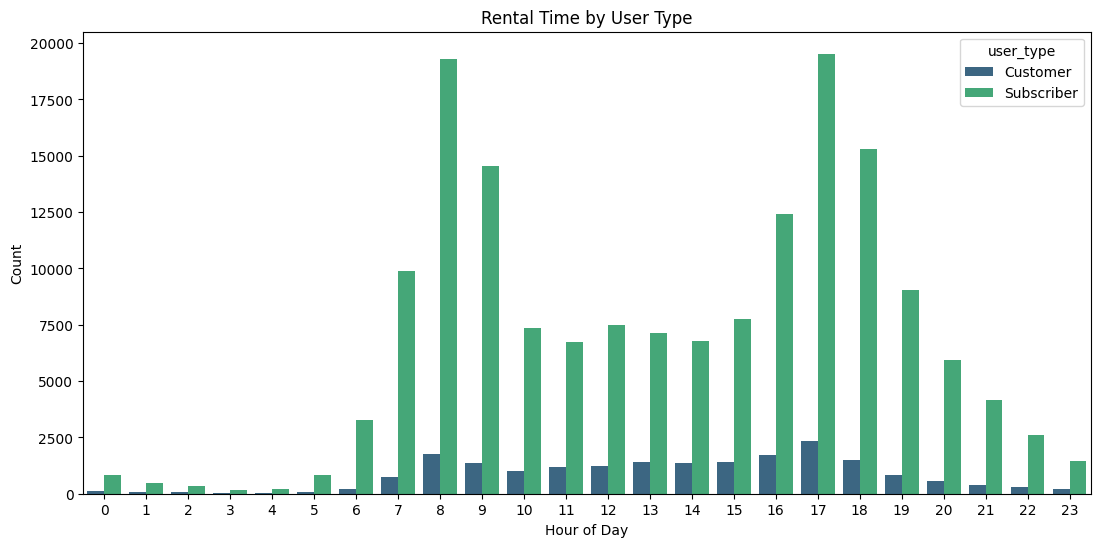

In [35]:
plt.subplots(figsize = (13,6))
sns.countplot(data= new_df, x='rent_hour', hue='user_type', palette="viridis")
plt.title('Rental Time by User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Count');

# Bivariate Exploration

scatter and boxplot

In [36]:
new_df.head(2)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,month_of_trip,day_of_week,rent_hour,return_hour,rent_duration_minute,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984,Male,No,2019-02-28,February,Thursday,17,8,869.750000,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,0,not defined,No,2019-02-28,February,Thursday,18,6,708.683333,2019


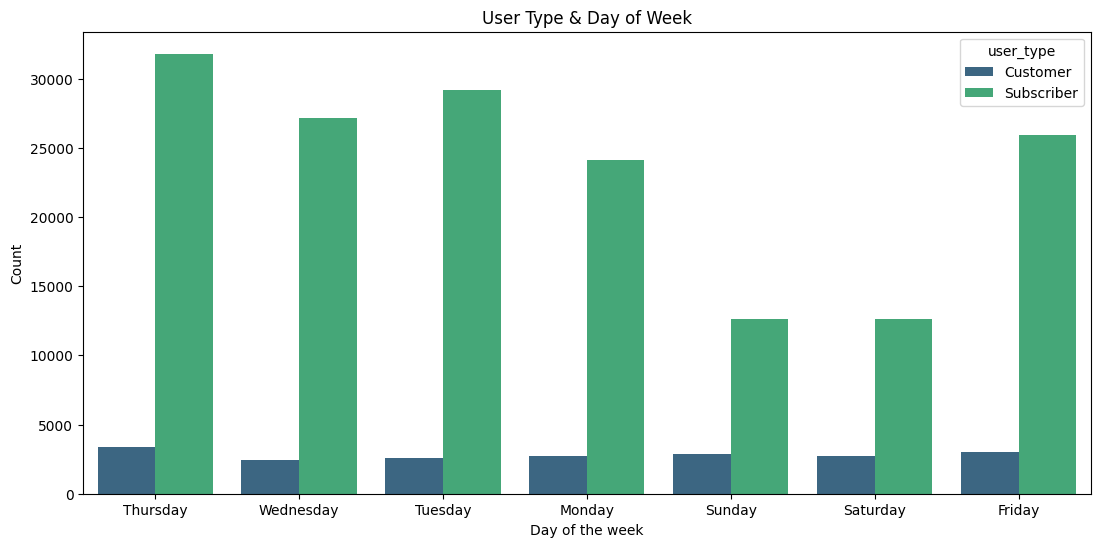

In [37]:
plt.subplots(figsize = (13,6))
sns.countplot(data=new_df, x='day_of_week', hue='user_type', palette="viridis")
plt.title('User Type & Day of Week')
plt.xlabel('Day of the week')
plt.ylabel('Count');

In [38]:
# Set heatmap correlations 
numeric_vars = ['rent_hour', 'duration_sec', 'member_birth_year']
categoric_vars = ['user_type', 'member_gender', 'day_of_week']

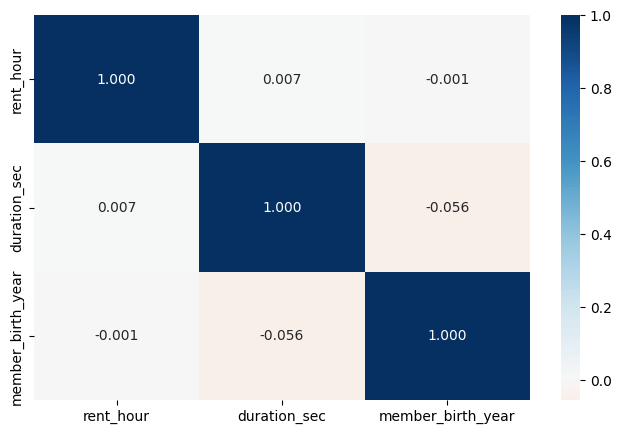

In [39]:
# correlation heatmap
plt.figure(figsize = [8, 5])
sns.heatmap(new_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'RdBu', center = 0)
plt.show()

No real strong colleration between these numeric variables. 

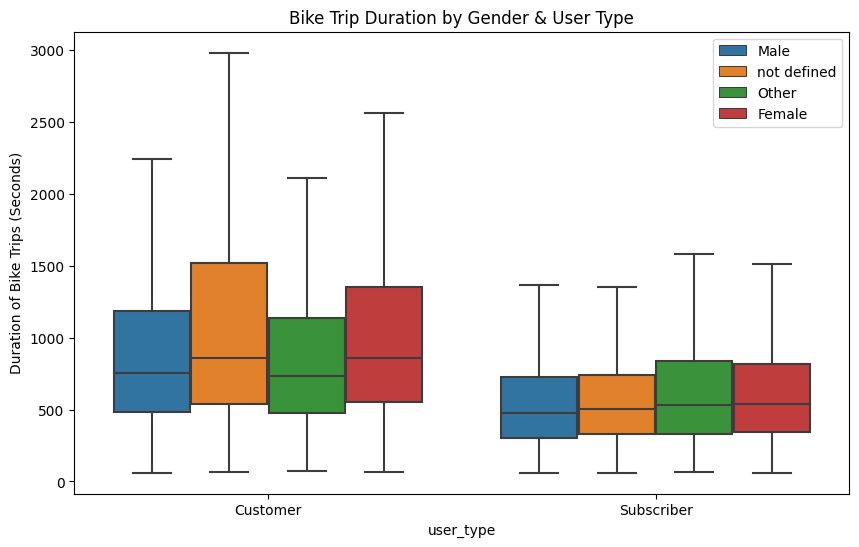

In [40]:
#boxplot 

def plot_box_no_outliers(df, x_col, y_col, hue_col, figsize, x_label, y_label, title, legend_loc):
    """
    This function creates a box plot with Seaborn, Matplotlib, excluding outliers. 


    Parameters:
    df(dataframe): the DataFrame to use for the plot 
    x_col (str): The column name to use for the x-axis 
    y_col (str): the column name to use for y-axis 
    hue_col (str): the column name to use for the hue
    figsize (tuple): the size of the figure 
    x_label (str): the label for the x-axis 
    y_label (str): the label for the y-axis 
    title (str): the title of the plot 
    legend_loc (str): the location of the legend 

    return:
    A box plot as per the given parameters, excluding outliers.
    """

    plt.figure(figsize = figsize)
    ax = sns.boxplot(data = df, x = x_col, y = y_col, hue = hue_col, showfliers=False )
    plt.legend(loc=legend_loc)

    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()

plot_box_no_outliers(df = new_df,
                    x_col = 'user_type',
                    y_col = 'duration_sec',
                    hue_col = 'member_gender',
                    figsize = [10,6],
                    x_label = 'user_type',
                    y_label = 'Duration of Bike Trips (Seconds)',
                    title = "Bike Trip Duration by Gender & User Type",
                    legend_loc = 'best')


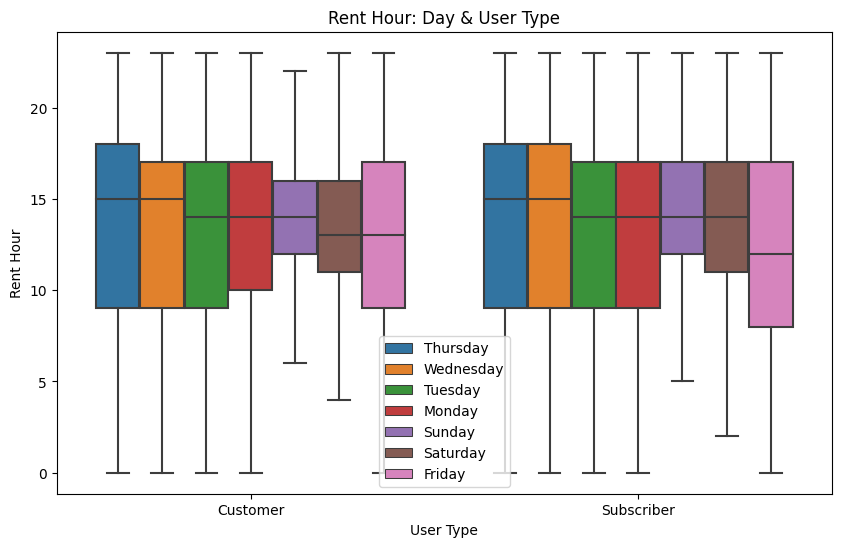

In [41]:
plot_box_no_outliers(df = new_df,
                    x_col = 'user_type',
                    y_col = 'rent_hour',
                    hue_col = 'day_of_week',
                    figsize = [10,6],
                    x_label = 'User Type',
                    y_label = 'Rent Hour',
                    title = "Rent Hour: Day & User Type",
                    legend_loc = 'best')

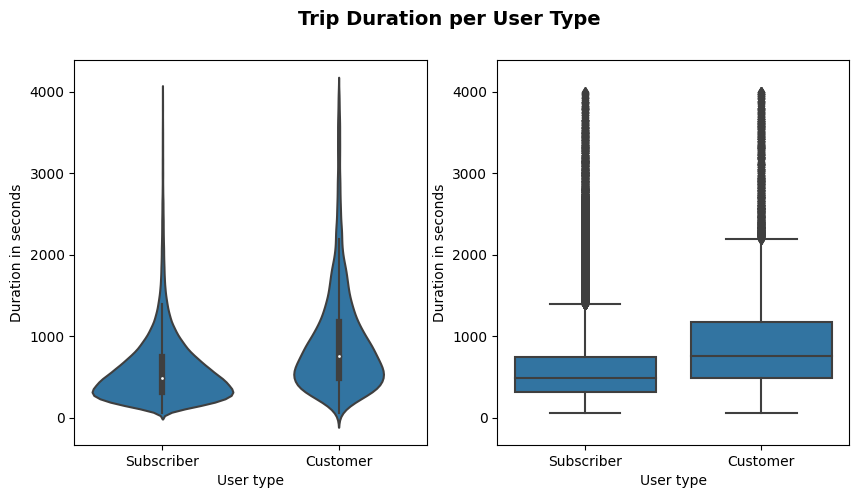

In [42]:
fig = plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
filter_data = df.query('duration_sec < 4000')

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = filter_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = filter_data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
fig.suptitle('Trip Duration per User Type', fontsize=14, fontweight='bold')
plt.show();

Customers rent the bike more than subscribers which is suprising. 

In [43]:
# Quick view of data
new_df.head(3)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,month_of_trip,day_of_week,rent_hour,return_hour,rent_duration_minute,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984,Male,No,2019-02-28,February,Thursday,17,8,869.750000,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,0,not defined,No,2019-02-28,February,Thursday,18,6,708.683333,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972,Male,No,2019-02-28,February,Thursday,12,5,1030.900000,47


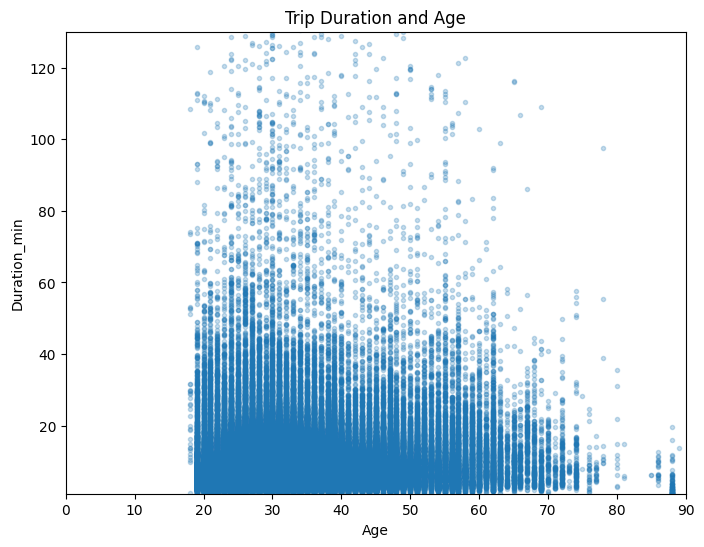

In [44]:
# scatter plot of duration_min vs. age
plt.figure(figsize=[8,6])
plt.scatter(new_df['age'], new_df['rent_duration_minute'], alpha = 0.25, marker = '.' )
plt.axis([0, 90, 1, 130])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_min')
plt.show()

-------------------------------

# Multivariate Exploration

- Create a facet plot
- Create a plot matrix or scatter plot, with multiple encodings.

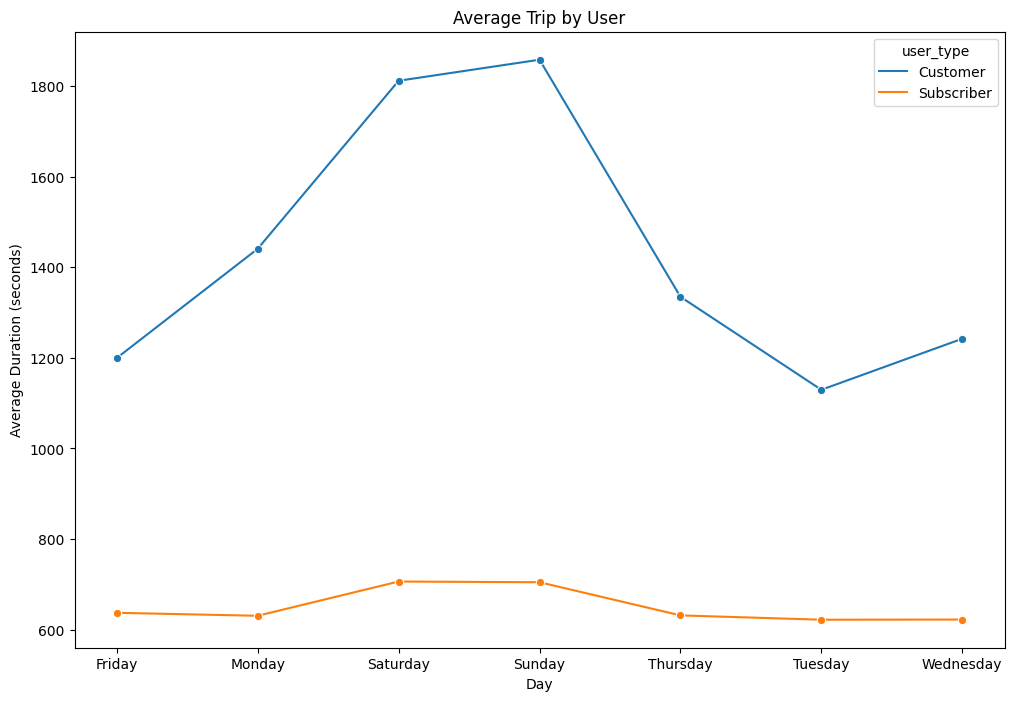

In [45]:
user_day_avg_secs = new_df.groupby(['user_type','day_of_week']).duration_sec.mean()
user_day_avg_secs = user_day_avg_secs.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[12,8])
sns.lineplot(data = user_day_avg_secs, x='day_of_week', y='duration_sec', hue='user_type', marker = 'o')
plt.title("Average Trip by User")
plt.xlabel('Day')
plt.ylabel('Average Duration (seconds)');

In [46]:
new_df['month_of_trip'].value_counts()

month_of_trip
February    183412
Name: count, dtype: int64

C:\Users\hunter\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


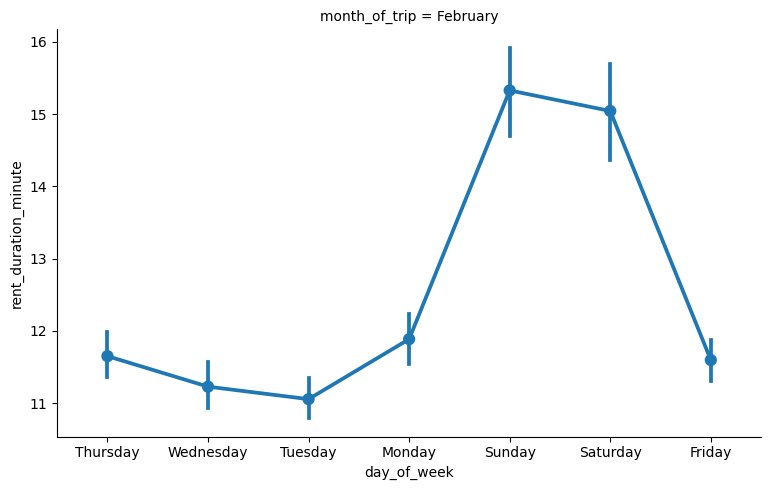

In [47]:
bin_edges = np.arange(0,31,1)
g=sns.FacetGrid(data=new_df, col='month_of_trip', col_wrap = 2,height = 5, aspect = 1.5)
g.map(sns.pointplot,'day_of_week', 'rent_duration_minute');

Peak days are Saturday and Sunday with Sunday having the highest rent duration. 

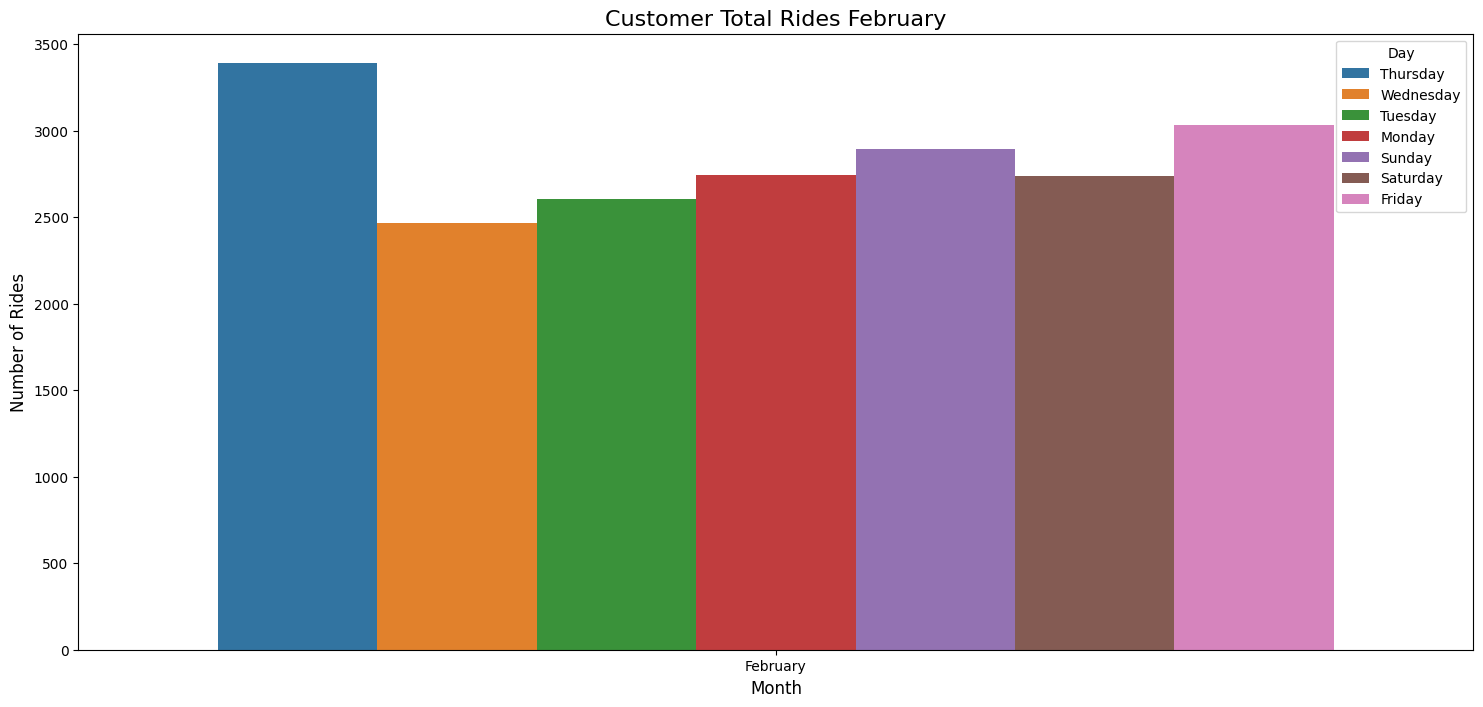

In [48]:
plt.figure(figsize=[18, 8])
sns.countplot(data = new_df.query('user_type == "Customer"'), x = 'month_of_trip', hue = 'day_of_week').legend(loc ='best')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Customer Total Rides February', fontsize=16)
plt.legend(title = 'Day');

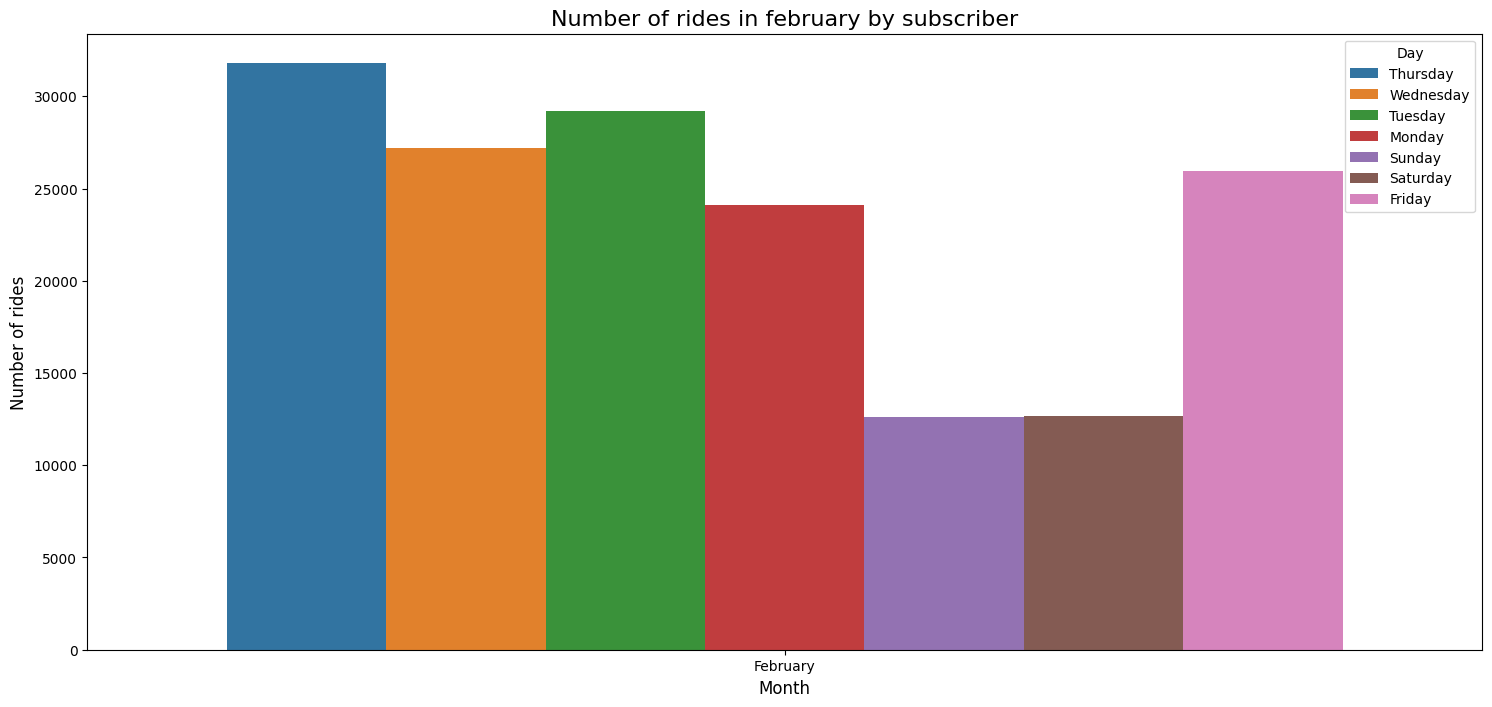

In [49]:
plt.figure(figsize=[18, 8])
sns.countplot(data = new_df.query('user_type == "Subscriber"'), x = 'month_of_trip', hue = 'day_of_week').legend(loc ='best')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides in february by subscriber', fontsize=16)
plt.legend(title = 'Day');

### Insight 
Suprisingly Thursday had the highest number of rides for the month of February for customers and subscribers. However Saturday and Sunday is half the amount for subscribers than by customers. But Tuesday is the second highest for subscribers. 

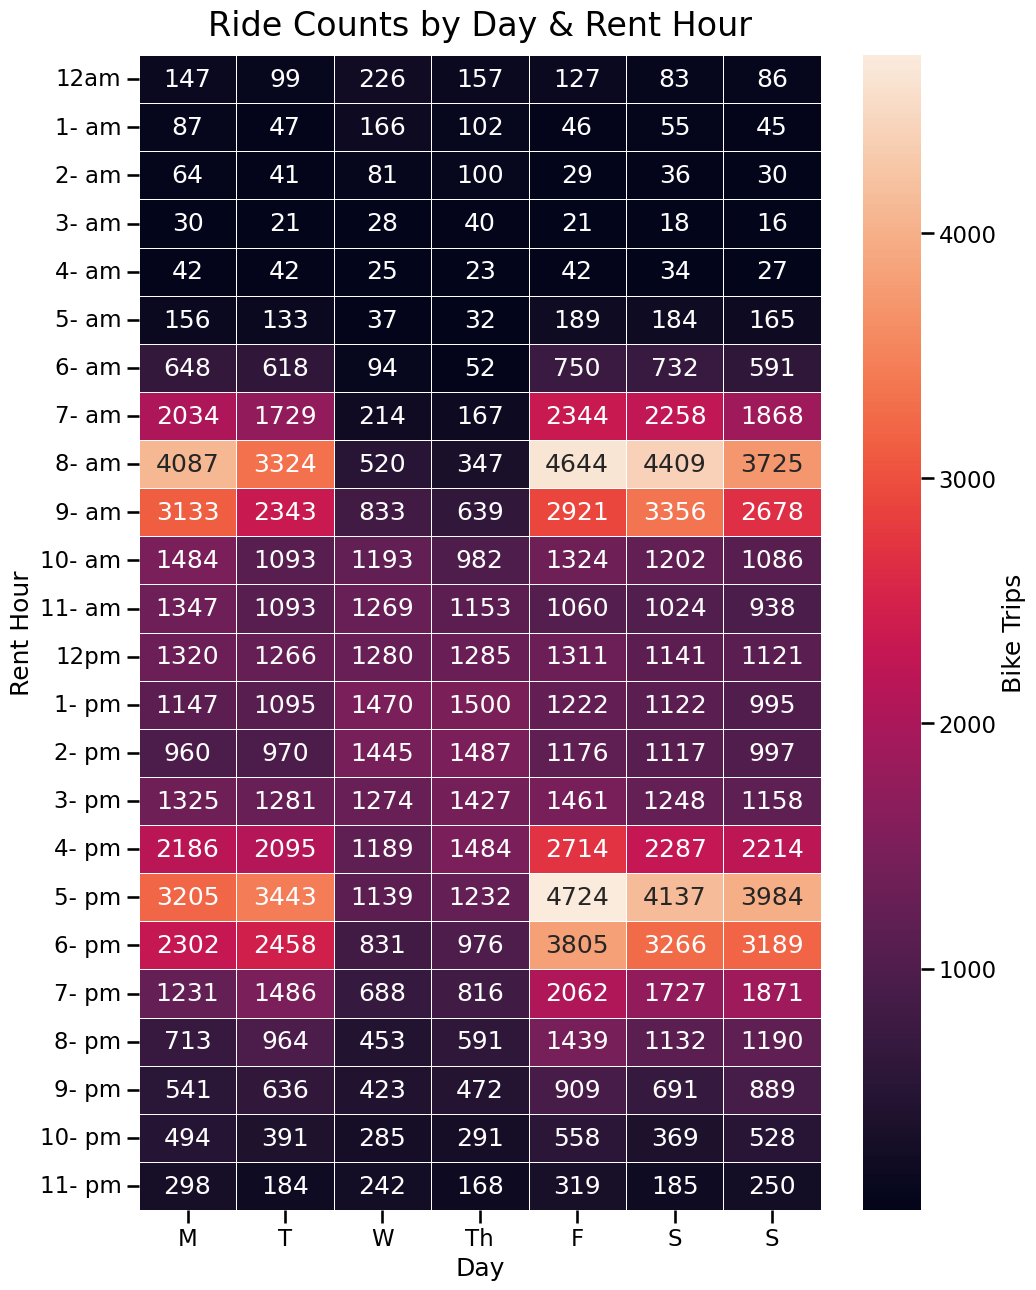

In [50]:
num_vars = pd.pivot_table(new_df[['day_of_week', 'rent_hour', 'duration_sec']], index=['day_of_week', 'rent_hour'], aggfunc='count')
df_num_vars = num_vars.unstack(level=0)

am_hrs = []
for hr in range(1, 12):
    start_hr = str(hr) + "- am"
    am_hrs.append(start_hr)
    
pm_hrs = []
for hr in range(1, 12):
    start_hr = str(hr) + "- pm"
    pm_hrs.append(start_hr)
    
start_hrs = ["12am"] + am_hrs + ["12pm"] + pm_hrs
day_symbol = ['M', 'T', 'W', 'Th', 'F', 'S', 'S']

sns.set_context("talk")
f, ax = plt.subplots(figsize=(11, 15))
ax = sns.heatmap(df_num_vars, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=day_symbol, yticklabels=start_hrs, 
                cbar_kws = {'label' : 'Bike Trips'},)
ax.axes.set_title("Ride Counts by Day & Rent Hour", fontsize=24, y=1.01)
ax.set(xlabel='Day', ylabel='Rent Hour');

## Insight

The heatmap is consistnet with earlier findings. In the morning from 7-9am time period this is a higher demand. Also, 4-6pm is another high demand for the service. The days for with the highest peak time morning and afternoon are Monday, Tuesday  Friday, Saturday & Sunday. 

-----------------------------------------------------------------------------------------------------------

# Conclusions 


1) What time do people most use this service? 

2) What day of the week is most busy, least busy? (By user_type)

3) What time of the day is the most demanding? 

4) Who uses this service the most? (subscribers / customers)

5) Who uses this service the most by age and gender?

6) How long to people normally use this bike? 

Rent Hour Time: 

- In the morning time 7-9am could be seen as the peak time for rentals. With 8pm having the highest start time.

- In the afternoon 4-6pm have a spike in start time with 5pm having the highest start time.

This could be due to working hours generally start and finish work from 8am-5pm / 9am-6pm working hours to and from work creating a higher demand for those times.

- Most trips taken are about 5-12 minutes

- Ages 20-60 spend the most time using the bike 

------------------------------------------------------------------------------------------------------------------------------------------

Users:

- 89% of users are subscribers with 71% of riders are male. 

- Female Customers and subscriber user type spend more time riding  


------------------------------------------------------------------------------------------------------------------------------------------

Day: 

- Thursday has the highest trips take by both customer and subscribers. However, Subscribers have over 30,000 trips but customers have less than 5,000 trips. 


- Saturday and Sunday have the longest trip duration for both user types 
------------------------------------------------------------------------------------------------------------------------------------------


Trips by User: 

- Customers have longer duration of trips on Saturday and Sunday 


This could be a reason that tourist use the service when traveling to that area having longer trip durations exploring a new area. Whereas subscribers might use it for work reasons getting to and from work with much shorter trip durations. Also there about 90% subscribers meaning the average appears lower compared to customers. 


------------------------------------------------------------------------------------------------------------------------------------------

User Age:

- Age 25-35, has the highest age range. Whereas, ages 45-65 being on the lower end of the age distribution.

- The Mean user age is 34 years old. 

- 20- 60 Years old have the longest rent duration with 28 -32 ages having the higest duration out of that age group 

--------------------------------------------------

In [51]:
## Save file and use for explanation template 
clean_bike = new_df.to_csv('clean_bike.csv')